# Loading Data

In [17]:
from model import *
from preprocessing import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
random_seed = 42
random.seed(random_seed)
X_train, X_test, y_train, y_test = load_np('./')
dim = (32, 32)
X_train, X_test = resize_images(X_train, X_test, dim)
X_train, X_test = flatten_images(X_train, X_test)
X = np.concatenate((X_train, X_test), axis=0)
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
X_train_t, X_val, y_train_t, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=random_seed)
y_train_t = y_train_t.reshape((-1, 1))
y_val = y_val.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))
input_shape = X_train.shape[1]

# Hyperparameter tuning

### Model Architecture

In [18]:
arch = []
arch.append([50, 5])
arch.append([128, 32, 5])
arch.append([512, 64, 5])
arch.append([128, 64, 16, 5])
arch.append([512, 128, 32, 5])
activation = 'relu'
lr = 0.001
epochs = 100
i = False
batch_size = 16
reg = 0.05
for architecture in arch:
    if i:
        del nn
        i = True
    nn = NeuralNet(input_shape, architecture, 'relu', lr, reg)
    training_loss, training_accuracy, validation_loss, validation_accuracy = nn.fit(X_train_t, y_train_t, (X_val, y_val), epochs, batch_size, verbose=False)
    best_epoch = np.argmin(validation_loss)
    print('Neural Net: ', architecture, ' Loss:', validation_loss[best_epoch], ', acc:', validation_accuracy[best_epoch])
    print('-----------------------------------------------------------------')

Neural Net:  [50, 5]  Loss: 1.3313686464555947 , acc: 0.44339622641509435
-----------------------------------------------------------------
Neural Net:  [128, 32, 5]  Loss: 1.3132177401015361 , acc: 0.42452830188679247
-----------------------------------------------------------------
Neural Net:  [512, 64, 5]  Loss: 1.2549772536238137 , acc: 0.46226415094339623
-----------------------------------------------------------------
Neural Net:  [128, 64, 16, 5]  Loss: 1.275433250193934 , acc: 0.44025157232704404
-----------------------------------------------------------------
Neural Net:  [512, 128, 32, 5]  Loss: 1.2623323044998709 , acc: 0.46540880503144655
-----------------------------------------------------------------


| Architecture         | No.of Neurons     | acc   | loss |
|----------------------|-------------------|-------|------|
| [50, 5]              | 55                | 0.443 | 1.33 |
| [128, 32, 5]         | 165               | 0.424 |1.313 |
| [512, 64, 5]         | 581               | 0.462 | 1.25 |
| [128, 64, 16, 5]     | 213               | 0.440 | 1.27 |
| [512, 128, 32, 5]    | 677               | 0.465 | 1.26 |

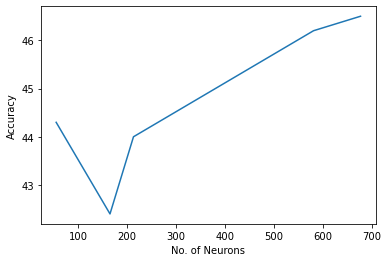

In [20]:
x = [55, 165, 213, 581, 677]
y = [44.3, 42.4, 44.0, 46.2, 46.5]
plt.plot(x, y)
plt.xlabel('No. of Neurons')
plt.ylabel('Accuracy')
plt.show()

We can see that as the number of neurons increases, the accuracy increases. Although the first architecture has small number of neurons it gives good results with respect to the other architectures. Here, we will use the 3 layered architecture [512, 64, 5], as it has pretty good accuracy and it's only 3 layers. We will use it next

### Learning Rate and Regularization

##### Course Search

In [21]:
arch = [512, 64, 5]
activation = 'relu'
epochs = 10
i = False
batch_size = 16
best_loss = []
best_acc = []
reg_range = []
lr_range = []
max_iterations = 100
for i in range(max_iterations):
    reg = 10**random.uniform(-5, 3)
    reg_range.append(reg)
    lr = 10**random.uniform(-3, -6)
    lr_range.append(lr)
    if i:
        del nn
        i = True
    nn = NeuralNet(input_shape, arch, activation, lr, reg)
    training_loss, training_accuracy, validation_loss, validation_accuracy = nn.fit(X_train_t, y_train_t, (X_val, y_val), epochs, batch_size, verbose=False)
    best_epoch = np.argmin(validation_loss)
    print('lr:', lr, ', reg:', reg, ' -> loss:', validation_loss[best_epoch], ', acc:', validation_accuracy[best_epoch])
    best_loss.append(validation_loss[best_epoch])
    best_acc.append(validation_accuracy[best_epoch])
    print('-----------------------------------------------------------------')

lr: 0.000841332632981202 , reg: 1.3044108051947598  -> loss: 1.463440864916594 , acc: 0.32075471698113206
-----------------------------------------------------------------
lr: 0.0002139773405658069 , reg: 0.0015857493678954682  -> loss: 1.4417329379949024 , acc: 0.36163522012578614
-----------------------------------------------------------------
lr: 9.330427394629357e-06 , reg: 7.794167115591616  -> loss: 1.730517237452616 , acc: 0.21069182389937108
-----------------------------------------------------------------
lr: 0.000548508676912149 , reg: 137.22604340279108  -> loss: 1.6094216011950007 , acc: 0.20440251572327045
-----------------------------------------------------------------
lr: 0.0008139698932261048 , reg: 0.023734197802324324  -> loss: 1.3673799557285802 , acc: 0.3805031446540881
-----------------------------------------------------------------
lr: 3.047432786474719e-05 , reg: 0.0005611820851697431  -> loss: 1.6810610147702492 , acc: 0.29559748427672955
--------------------

lr: 7.163778355449149e-05 , reg: 3.22271313543059e-05  -> loss: 1.5777892194116545 , acc: 0.33647798742138363
-----------------------------------------------------------------
lr: 2.586169375861441e-05 , reg: 931.0457927155956  -> loss: 1.609435378224979 , acc: 0.20440251572327045
-----------------------------------------------------------------
lr: 2.6161394711435873e-06 , reg: 586.985023811955  -> loss: 1.6062668393784154 , acc: 0.1949685534591195
-----------------------------------------------------------------
lr: 6.883899826618491e-06 , reg: 1.2355154356630435e-05  -> loss: 2.0897262853675493 , acc: 0.16037735849056603
-----------------------------------------------------------------
lr: 2.4495652294698126e-05 , reg: 2.8423853246856927  -> loss: 1.6842644847467296 , acc: 0.24528301886792453
-----------------------------------------------------------------
lr: 1.1943032228590768e-05 , reg: 0.0013633316580506556  -> loss: 1.8767460557678233 , acc: 0.20754716981132076
---------------

lr: 4.50982153925127e-05 , reg: 0.0003324078470782392  -> loss: 1.6550352080802089 , acc: 0.29559748427672955
-----------------------------------------------------------------
lr: 0.00014600393676289606 , reg: 0.02371663766757642  -> loss: 1.4921834813475063 , acc: 0.37735849056603776
-----------------------------------------------------------------
lr: 1.6990384301000907e-06 , reg: 0.000996440986584168  -> loss: 2.2016496871152893 , acc: 0.20125786163522014
-----------------------------------------------------------------
lr: 2.605869637627082e-06 , reg: 0.03507889952143826  -> loss: 1.937435561119476 , acc: 0.22327044025157233
-----------------------------------------------------------------
lr: 0.0007050745054034764 , reg: 0.2526984043491442  -> loss: 1.3187286841754893 , acc: 0.41823899371069184
-----------------------------------------------------------------
lr: 3.1039680676104187e-06 , reg: 986.869546227394  -> loss: 1.6088468670505243 , acc: 0.20754716981132076
----------------

In [27]:
k = 10
min_params = np.argpartition(np.asnumpy(np.array(best_loss)), k)[:k]
for i in min_params:
    print(i, ' lr:', lr_range[i], ', reg:', reg_range[i], ' -> loss:', best_loss[i], ', acc:', best_acc[i])

84  lr: 0.00040092621483870414 , reg: 0.0005174810598616098  -> loss: 1.3398787156597647 , acc: 0.389937106918239
59  lr: 0.00034792224288507617 , reg: 0.7443234325150725  -> loss: 1.3610656137365136 , acc: 0.34276729559748426
98  lr: 0.0007050745054034764 , reg: 0.2526984043491442  -> loss: 1.3187286841754893 , acc: 0.41823899371069184
65  lr: 0.0006702309834206347 , reg: 0.002884782024414727  -> loss: 1.3565013764976674 , acc: 0.4308176100628931
4  lr: 0.0008139698932261048 , reg: 0.023734197802324324  -> loss: 1.3673799557285802 , acc: 0.3805031446540881
33  lr: 0.0008011231252679626 , reg: 0.0006798053462405661  -> loss: 1.361072429218368 , acc: 0.4025157232704403
6  lr: 0.00025321361177018504 , reg: 1.630375939209321e-05  -> loss: 1.3809215408045146 , acc: 0.3867924528301887
11  lr: 0.0003416343261944865 , reg: 0.005272348778347949  -> loss: 1.3951084188848555 , acc: 0.3710691823899371
42  lr: 0.00021980507857141462 , reg: 0.015674873372492595  -> loss: 1.3951637852203909 , acc: 0

##### Fine Search

In [28]:
arch = [512, 64, 5]
activation = 'relu'
epochs = 10
i = False
batch_size = 16
best_loss = []
best_acc = []
reg_range = []
lr_range = []
max_iterations = 100
for i in range(max_iterations):
    reg = 10**random.uniform(-5, -1)
    reg_range.append(reg)
    lr = 10**random.uniform(-3, -4)
    lr_range.append(lr)
    if i:
        del nn
        i = True
    nn = NeuralNet(input_shape, arch, activation, lr, reg)
    training_loss, training_accuracy, validation_loss, validation_accuracy = nn.fit(X_train_t, y_train_t, (X_val, y_val), epochs, batch_size, verbose=False)
    best_epoch = np.argmin(validation_loss)
    print(i, ' lr:', lr, ', reg:', reg, ' -> loss:', validation_loss[best_epoch], ', acc:', validation_accuracy[best_epoch])
    best_loss.append(validation_loss[best_epoch])
    best_acc.append(validation_accuracy[best_epoch])
    print('-----------------------------------------------------------------')

0  lr: 0.00011847671854116283 , reg: 0.07515969847598732  -> loss: 1.561977433308926 , acc: 0.279874213836478
-----------------------------------------------------------------
True  lr: 0.0006818500699594759 , reg: 0.024818923342561774  -> loss: 1.3675191763466312 , acc: 0.41823899371069184
-----------------------------------------------------------------
True  lr: 0.0006112976141885896 , reg: 0.0008761218303644402  -> loss: 1.4122932714614709 , acc: 0.39622641509433965
-----------------------------------------------------------------
True  lr: 0.0008737045552918158 , reg: 0.00040193994634229053  -> loss: 1.3813189164414659 , acc: 0.39937106918238996
-----------------------------------------------------------------
True  lr: 0.0001034406298311277 , reg: 0.00032801407222894874  -> loss: 1.5167759115132422 , acc: 0.330188679245283
-----------------------------------------------------------------
True  lr: 0.00016441044243739296 , reg: 0.00011503029476942819  -> loss: 1.4990332256810683 ,

True  lr: 0.0005470723150330831 , reg: 0.0035355217166447234  -> loss: 1.3702960567225475 , acc: 0.4339622641509434
-----------------------------------------------------------------
True  lr: 0.0002807498797214697 , reg: 0.009224092158908011  -> loss: 1.4234834853174958 , acc: 0.3584905660377358
-----------------------------------------------------------------
True  lr: 0.0009779807363040878 , reg: 0.0005137450801673016  -> loss: 1.3994885049209813 , acc: 0.3805031446540881
-----------------------------------------------------------------
True  lr: 0.00013088612393824422 , reg: 1.9997487790209126e-05  -> loss: 1.515803045470509 , acc: 0.3270440251572327
-----------------------------------------------------------------
True  lr: 0.00028471458210705357 , reg: 0.041277585556330446  -> loss: 1.4261233700715916 , acc: 0.3867924528301887
-----------------------------------------------------------------
True  lr: 0.00026151128426953713 , reg: 0.02179616463011448  -> loss: 1.5098526215203563 ,

True  lr: 0.0003904874597746839 , reg: 0.00017263889549728464  -> loss: 1.448207283069028 , acc: 0.3867924528301887
-----------------------------------------------------------------
True  lr: 0.0005062264085701988 , reg: 0.00040700669038938673  -> loss: 1.374635957587307 , acc: 0.389937106918239
-----------------------------------------------------------------
True  lr: 0.0003797988682183681 , reg: 3.229618292434884e-05  -> loss: 1.4263076128434735 , acc: 0.39622641509433965
-----------------------------------------------------------------
True  lr: 0.00021022388355282124 , reg: 0.057737062300664006  -> loss: 1.4608331163386692 , acc: 0.36792452830188677
-----------------------------------------------------------------
True  lr: 0.0002423734719356785 , reg: 0.040852833397505915  -> loss: 1.39357517037819 , acc: 0.3836477987421384
-----------------------------------------------------------------
True  lr: 0.00028318013656708594 , reg: 0.000159881972740045  -> loss: 1.4373019129928575 , 

In [29]:
k = 10
min_params = np.argpartition(np.asnumpy(np.array(best_loss)), k)[:k]
for i in min_params:
    print(i, ' lr:', lr_range[i], ', reg:', reg_range[i], ' -> loss:', best_loss[i], ', acc:', best_acc[i])

52  lr: 0.0007456834095261669 , reg: 3.911786488391092e-05  -> loss: 1.3152561468334991 , acc: 0.44654088050314467
56  lr: 0.0007892350759190251 , reg: 9.956781045663863e-05  -> loss: 1.304744398300485 , acc: 0.4371069182389937
55  lr: 0.0006164863451748649 , reg: 0.03941835950977992  -> loss: 1.333327812516228 , acc: 0.4119496855345912
17  lr: 0.0007587756511035078 , reg: 8.726007461358895e-05  -> loss: 1.345881885798737 , acc: 0.4308176100628931
88  lr: 0.00046751975208450595 , reg: 0.00453890130716246  -> loss: 1.3584068060155758 , acc: 0.41509433962264153
34  lr: 0.0009821479010420112 , reg: 0.004129574170907785  -> loss: 1.349134423178561 , acc: 0.4339622641509434
9  lr: 0.000505000926043748 , reg: 4.160900217398261e-05  -> loss: 1.3638318132739071 , acc: 0.41823899371069184
1  lr: 0.0006818500699594759 , reg: 0.024818923342561774  -> loss: 1.3675191763466312 , acc: 0.41823899371069184
73  lr: 0.0005258658970500168 , reg: 0.07371509272988874  -> loss: 1.3676813182516943 , acc: 0.3

### Activation Functions

In [30]:
arch = [512, 64, 5]
reg = 3.9e-5
lr = 0.00075
epochs = 50
i = False
batch_size = 16
best_loss = {}
best_acc = {}
act_func = ['linear', 'tanh', 'sigmoid', 'relu']
for act in act_func:
    if i:
        del nn
        i = True
    nn = NeuralNet(input_shape, arch, act, lr, reg)
    training_loss, training_accuracy, validation_loss, validation_accuracy = nn.fit(X_train_t, y_train_t, (X_val, y_val), epochs, batch_size, verbose=False)
    best_epoch = np.argmin(validation_loss)
    print('Activation:', act, ' -> loss:', validation_loss[best_epoch], ', acc:', validation_accuracy[best_epoch])
    best_loss[act] = validation_loss[best_epoch]
    best_acc[act] = validation_accuracy[best_epoch]
    print('-----------------------------------------------------------------')

Activation: linear  -> loss: 1.7387127447481594 , acc: 0.34591194968553457
-----------------------------------------------------------------
Activation: tanh  -> loss: 1.3688348179517722 , acc: 0.389937106918239
-----------------------------------------------------------------
Activation: sigmoid  -> loss: 1.3607459590096083 , acc: 0.3490566037735849
-----------------------------------------------------------------
Activation: relu  -> loss: 1.3980831052285723 , acc: 0.4119496855345912
-----------------------------------------------------------------


We can see that the best accuracy and loss are for relu, which we will use next

### Training batch size

In [31]:
arch = [512, 64, 5]
reg = 3.9e-5
lr = 0.00075
epochs = 50
act = 'relu'
i = False
best_loss = []
best_acc = []
batch_range = [1, 8, 16, 32, 64, 128]
for batch_size in batch_range:
    if i:
        del nn
        i = True
    nn = NeuralNet(input_shape, arch, act, lr, reg)
    training_loss, training_accuracy, validation_loss, validation_accuracy = nn.fit(X_train_t, y_train_t, (X_val, y_val), epochs, batch_size, verbose=False)
    best_epoch = np.argmin(validation_loss)
    print('Batch Size:', batch_size, ' -> loss:', validation_loss[best_epoch], ', acc:', validation_accuracy[best_epoch])
    best_loss.append(validation_loss[best_epoch])
    best_acc.append(validation_accuracy[best_epoch])
    print('-----------------------------------------------------------------')

Batch Size: 1  -> loss: 1.330325196433499 , acc: 0.41509433962264153
-----------------------------------------------------------------
Batch Size: 8  -> loss: 1.3966261554079449 , acc: 0.39622641509433965
-----------------------------------------------------------------
Batch Size: 16  -> loss: 1.4072254378297335 , acc: 0.4088050314465409
-----------------------------------------------------------------
Batch Size: 32  -> loss: 1.3431116247258845 , acc: 0.4025157232704403
-----------------------------------------------------------------
Batch Size: 64  -> loss: 1.3421707288265932 , acc: 0.3490566037735849
-----------------------------------------------------------------
Batch Size: 128  -> loss: 1.4656962990435187 , acc: 0.3018867924528302
-----------------------------------------------------------------


We can see that as the size of the batch increases the accuracy decreases. However, the problem with low batch_sizes is that they take a lot of time as they are less parallelizable. In our case, we will choose Batch Size of 32, as it has good accuracy besides the fact it's quite large.

In [38]:
type(batch_range)

list

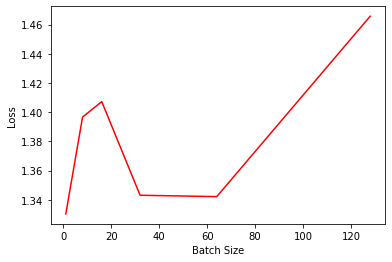

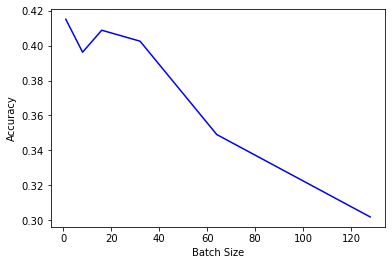

In [41]:
plt.plot(np.asnumpy(np.array(batch_range)), np.asnumpy(np.array(best_loss)), label='Validation Loss', color='red')
plt.xlabel('Batch Size')
plt.ylabel('Loss')
plt.show()
plt.plot(np.asnumpy(np.array(batch_range)), np.asnumpy(np.array(best_acc)), label='Validation Accuracy', color='blue')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.show()

### Training the Neural Network with the best parameters

Epoch ( 0 )-> Train (Loss: 1.5463 , Acc: 0.3524 ), Val (Loss: 1.6378 , Acc: 0.2516 )
Epoch ( 1 )-> Train (Loss: 1.3973 , Acc: 0.4168 ), Val (Loss: 1.5412 , Acc: 0.3019 )
Epoch ( 2 )-> Train (Loss: 1.3069 , Acc: 0.4543 ), Val (Loss: 1.495 , Acc: 0.3176 )
Epoch ( 3 )-> Train (Loss: 1.2396 , Acc: 0.4865 ), Val (Loss: 1.4659 , Acc: 0.3333 )
Epoch ( 4 )-> Train (Loss: 1.1849 , Acc: 0.5194 ), Val (Loss: 1.445 , Acc: 0.3491 )
Epoch ( 5 )-> Train (Loss: 1.1389 , Acc: 0.5461 ), Val (Loss: 1.43 , Acc: 0.3522 )
Epoch ( 6 )-> Train (Loss: 1.099 , Acc: 0.5629 ), Val (Loss: 1.4181 , Acc: 0.3553 )
Epoch ( 7 )-> Train (Loss: 1.0636 , Acc: 0.5825 ), Val (Loss: 1.408 , Acc: 0.3553 )
Epoch ( 8 )-> Train (Loss: 1.0316 , Acc: 0.5982 ), Val (Loss: 1.4002 , Acc: 0.3522 )
Epoch ( 9 )-> Train (Loss: 1.0023 , Acc: 0.614 ), Val (Loss: 1.3936 , Acc: 0.3616 )
Epoch ( 10 )-> Train (Loss: 0.9749 , Acc: 0.6273 ), Val (Loss: 1.388 , Acc: 0.3711 )
Epoch ( 11 )-> Train (Loss: 0.9493 , Acc: 0.6406 ), Val (Loss: 1.3833 , 

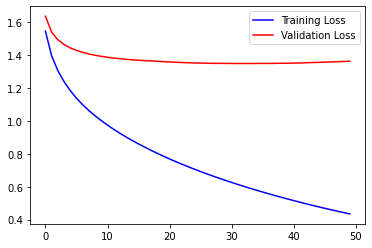

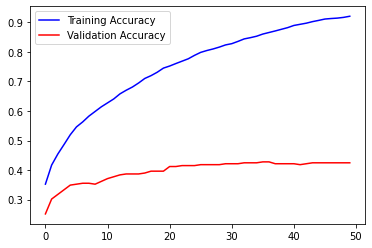

In [42]:
arch = [512, 64, 5]
reg = 3.9e-5
lr = 0.00075
epochs = 50
act = 'relu'
batch_size = 32
nn = NeuralNet(input_shape, arch, act, lr, reg)
training_loss, training_accuracy, validation_loss, validation_accuracy = nn.fit(X_train_t, y_train_t, (X_val, y_val), epochs, batch_size, verbose=True)
plot_graphs(training_loss, training_accuracy, validation_loss, validation_accuracy, epochs)

The model reachs a validation accuracy of 42%. 

In [43]:
# Lets evaluate it on the test data
acc, loss = nn.evaluate(X_test, y_test, batch_size)
print('Test Results -> Accuracy: ', acc, ', Loss: ', loss)

Test Results -> Accuracy:  0.48893360160965793 , Loss:  1.3032430201125258


It gives higher accuracy of ~49%

### CCR Calculations

##### Correct Classification Rate per class

In [61]:
for i in range(5):
    isclass = (y_test==i).reshape((-1,))
    X_class = X_test[isclass]
    y_class = y_test[isclass]
    acc, _ = nn.evaluate(X_class, y_class, batch_size)
    print('Class ', i, ': CCR-> ', acc)

Class  0 : CCR->  0.38
Class  1 : CCR->  0.66
Class  2 : CCR->  0.26262626262626265
Class  3 : CCR->  0.6767676767676768
Class  4 : CCR->  0.47474747474747475


##### Average Correct Classification Rate

In [62]:
acc, _ = nn.evaluate(X_test, y_test, batch_size)
print('ACCR-> ', acc)

ACCR->  0.48893360160965793
